<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E6%9D%B1%E4%BA%AC%E9%9B%BB%E5%8A%9B%E9%9C%80%E8%A6%81%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
import pandas as pd
from fbprophet import  Prophet

In [4]:
_df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv', encoding='shift-jis', skiprows=1)

In [6]:
_df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [7]:
years = [2017, 2018, 2019]
# year = years[2]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv', encoding='shift-jis', skiprows=1)
    df = pd.concat([df, _df], axis=0)


In [8]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [9]:
df = df.reset_index(drop=True)

In [11]:
df['DATE'][0]

'2017/1/1'

In [13]:
df['TIME'][0]

'0:00'

In [15]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'
str_datetime

'2017/1/1 0:00'

In [17]:
from datetime import datetime as dt

In [19]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
datetime

datetime.datetime(2017, 1, 1, 0, 0)

In [36]:
datetimes = []

for index, datum in df.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')

    datetimes.append(datetime)

In [25]:
datetimes[:3]

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0)]

In [26]:
df['ds'] = datetimes

In [28]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [30]:
df = df.rename(columns={'実績(万kW)': 'y'})
df

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [42]:
model = Prophet()

In [43]:
model.fit(df)

In [51]:
future = model.make_future_dataframe(24*366, freq='H')
future.tail

<bound method NDFrame.tail of                        ds
0     2017-01-01 00:00:00
1     2017-01-01 01:00:00
2     2017-01-01 02:00:00
3     2017-01-01 03:00:00
4     2017-01-01 04:00:00
...                   ...
35059 2020-12-31 19:00:00
35060 2020-12-31 20:00:00
35061 2020-12-31 21:00:00
35062 2020-12-31 22:00:00
35063 2020-12-31 23:00:00

[35064 rows x 1 columns]>

In [53]:
forecast = model.predict(future)

In [54]:
import matplotlib.pyplot as plt

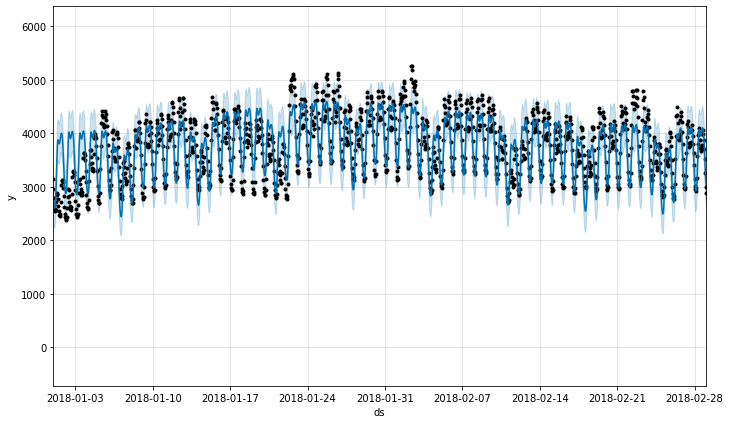

In [57]:
model.plot(forecast)
plt.xlim(dt(2018,1,1), dt(2018, 3, 1))
plt.show()